# Find a bad visualization from local media. Comment on why you think it is a bad visualization. Reimplement the visualization

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

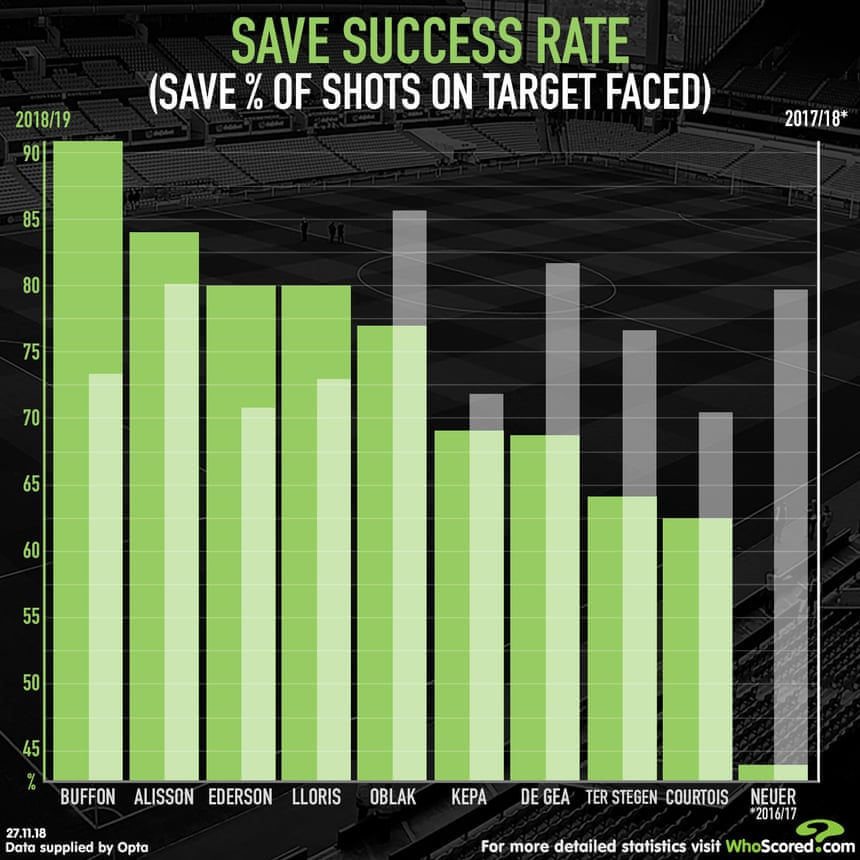

In [10]:
from IPython.display import Image
Image(filename='saves.png')


The visualization was a part of an e-article published by 'The Guardian' concerning european football goalkeeper statistics
- https://www.theguardian.com/football/who-scored-blog/2018/nov/29/europe-top-de-gea-courtois-ter-stegen-neuer

The stats are as follows for each player (2018/19 - 1st column, 2017/18 2nd column):
     
- Buffon     - 91   , 73
- Alisson    - 84   , 80
- Ederson    - 80   , 71
- Lloris     - 80   , 73
- Oblak      - 77   , 86
- Kepa       - 68   , 73
- De Gea     - 68   , 82
- Ter Stegen - 64   , 76
- Courtois   - 62.5 , 71
- Neuer      - 43.5 , 79.5

## Why is it a bad visualization

- For the 2018/19 season, its taking 2 'pixel' widths for no clear reason. It just masks the bars of the previous season
- The 2017/18 bars are light coloured, not really distinct so its harder to compare the seasons
- Its not as intuitive to indentify which bars belong to which seasons

In [11]:
Stats = {'Goalkeeper': ['Gigi Buffon','Alisson','Ederson','Lloris','Oblak','Kepa','De Gea','Ter Stegen','Courtois','Neuer'],
        'Season 2018/19': [91, 84, 80, 80, 77, 68, 68, 64, 62.5, 43.5],
         'Season 2017/18':[73, 80, 71, 73, 86, 73, 82, 76, 71, np.nan]}

df = pd.DataFrame(Stats, columns = ['Goalkeeper', 'Season 2018/19','Season 2017/18','Season 2016/17'])
print (df)

    Goalkeeper  Season 2018/19  Season 2017/18 Season 2016/17
0  Gigi Buffon            91.0            73.0            NaN
1      Alisson            84.0            80.0            NaN
2      Ederson            80.0            71.0            NaN
3       Lloris            80.0            73.0            NaN
4        Oblak            77.0            86.0            NaN
5         Kepa            68.0            73.0            NaN
6       De Gea            68.0            82.0            NaN
7   Ter Stegen            64.0            76.0            NaN
8     Courtois            62.5            71.0            NaN
9        Neuer            43.5             NaN            NaN


In [12]:
df["Goalkeeper"].str.find("Neuer")

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9    0
Name: Goalkeeper, dtype: int64

In [13]:
df['Season 2016/17'].iloc[9] = 79.5
df.head(10)

,Goalkeeper,Season 2018/19,Season 2017/18,Season 2016/17
0,Gigi Buffon,91.0,73.0,NaN
1,Alisson,84.0,80.0,NaN
2,Ederson,80.0,71.0,NaN
3,Lloris,80.0,73.0,NaN
4,Oblak,77.0,86.0,NaN
5,Kepa,68.0,73.0,NaN
6,De Gea,68.0,82.0,NaN
7,Ter Stegen,64.0,76.0,NaN
8,Courtois,62.5,71.0,NaN
9,Neuer,43.5,NaN,79.5


## Solution - Bar Plot w/ Seaborn

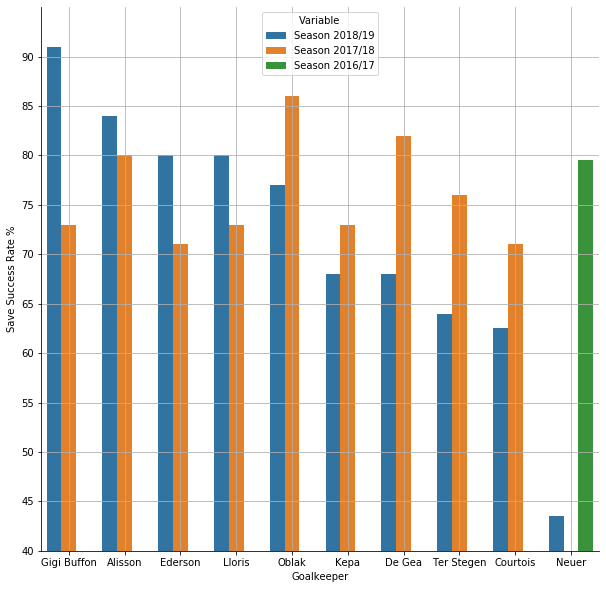

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Goalkeeper').rename(columns=str.title)
sns.barplot(x='Goalkeeper', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
ax1.set(ylabel='Save Success Rate %', xlabel='Goalkeeper')
ax1.set(ylim=(40, 95))
plt.yticks([40,45,50,55,60,65,70,75,80,85,90])
ax1.grid(zorder=0)


## Solution - Interactive Bar Plot w/ Plotly

In [15]:
import plotly.express as px

tidy_df = df.melt(id_vars="Goalkeeper")

fig = px.bar(tidy_df, x="Goalkeeper", y="value", color="variable", barmode="group")

fig.update_layout(
    title="European Football Statistics - Goalkeeper Save Success Rate",
    yaxis_title="Save Success Rate %",
   
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.show()

## Solution - Spider Chart w/ Plotly (For the PES fans)

In [16]:
print(" Blue Spider Chart : Season 2017/18 (Neuer - 2016/17) ------------- Red Spider Chart : Season 2018/19")
categories = ['Gigi Buffon','Alisson','Ederson','Lloris','Oblak','Kepa','De Gea','Ter Stegen','Courtois','Neuer']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[91, 84, 80, 80, 77, 68, 68, 64, 62.5, 43.5],
      theta=categories,
      fill='toself',
      name='Season 2018/19'
))
fig.add_trace(go.Scatterpolar(
      r=[73, 80, 71, 73, 86, 73, 82, 76, 71, 79.5],
      theta=categories,
      fill='toself',
      name='Season 2017/18'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[20, 100]
    )),
  showlegend=False
)

fig.show()

 Blue Spider Chart : Season 2017/18 (Neuer - 2016/17) ------------- Red Spider Chart : Season 2018/19
